## 🍃 Análise da base de dados que contém informações sobre solo e temperatura relacionados a tipos de plantações

O presente documento jupyter notebook tem como objetivos realizar análises exploratórias e descritivas assim como desenvolver modelos preditivos buscando a melhorar performance.

A obtenção dos dados já foi realizada e disponibilizada, e se encontra no arquivo estruturado chamado: Atividade_Cap_14_produtos_agricolas.csv.

### 💥 Pipeline para realização da modelagem:

Como os dados já foram obtidos, seguiremos para:

1. Limpeza dos dados
2. Exploração dos dados
3. Engenharia de features
4. Modelagem preditiva
5. Visualização dos dados
6. Comparação dos 5 modelos

## 🔥 Limpeza dos dados:

Os códigos abaixo estarão relacionados a limpeza da base, com o objetivo de:

- Encontrar dados faltantes
- Encontrar dados nulos
- Encontrar dados duplicados
- Encontrar outliers e tratá-los

In [1]:
# Imports
import missingno as mscno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Leitura do arquivo para mostrar informações do tipo de cada variável, quantidade de linhas e colunas
path = r"Atividade_Cap_14_produtos_agricolas.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
# Mostrar a quantidade de valores únicos em cada coluna
df.nunique()

# Existem 22 tipos de plantações diferentes na base

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [4]:
# Mostrar a quantidade de valores nulos em cada coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

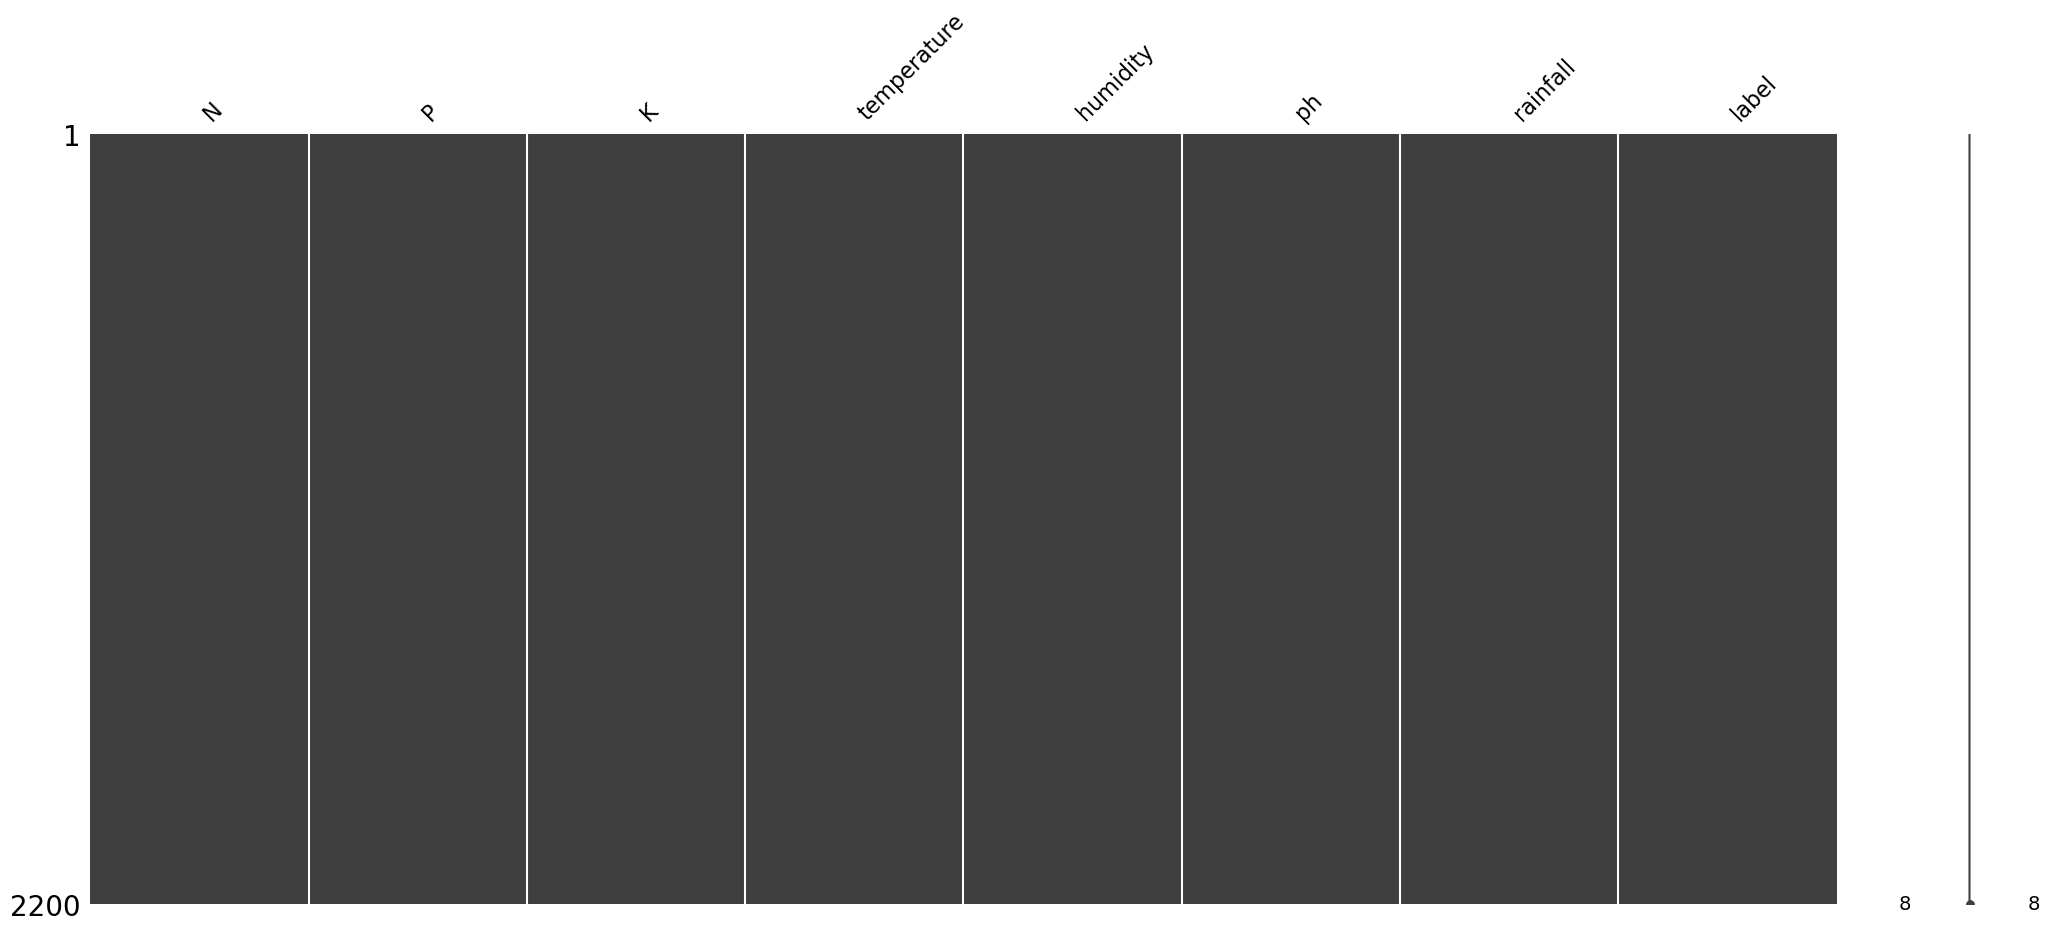

In [5]:
#Visualizar dados faltantes
mscno.matrix(df)

#Resultado: não há dados faltantes

In [6]:
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


In [7]:
# As 5 primeiras linhas do arquivo
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


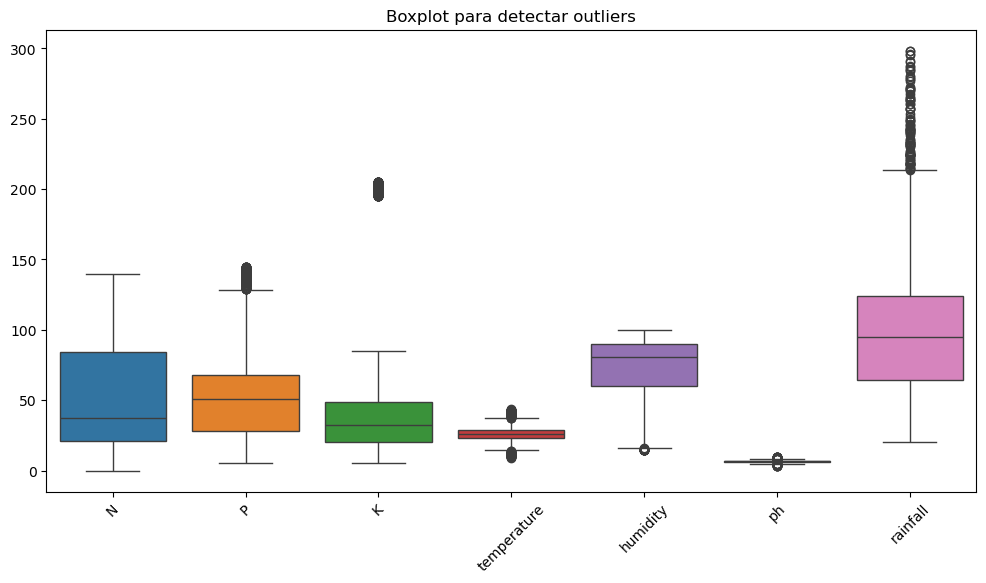

In [8]:
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

**Análise do gráfico de outliers**: somente o Nitrogênio (coluna N) e Potássio (K) não têm dados outliers.

**Resultado da limpeza:** não foram encontrados dados duplicados, nulos ou faltantes, mas sim outliers, que devido a não trazerem danos a base não foram tratados.


### 🍀 Características dos dados:

1. Fonte: **dados terciários**, pois são dados disponibilizados publicamente.
2. Granularidade: **dados desagregados**, pois são dados brutos e individuais.
3. Estrutura: **dados estruturados**, pois são dados organizados em coluna (variáveis) e linhas (valores).
4. Tipo: **dados numéricos e categóricos**
   1. Valores discretos nas colunas: N, P e K
   2. Valores contínuos nas colunas: temperature, humidity, ph e rainfall
   3. Valores nominais na coluna label

### 🌸 Definição dos dados:

O arquivo Atividade_Cap_14_produtos_agricolas.csv possui 8 colunas, das quais:

* N: quantidade de nitrogênio no solo
* P: quantidade de fósforo no solo
* K: quantidade de potássio no solo
* temperature: temperatura média da região em graus Celsius
* humidity: umidade média do ar na região
* ph: pH do solo
* rainfall: precipitação em milímetros
* label: tipo de cultura plantada nas condições daquela linha

In [9]:
#Pegando informações estatísticas sobre a base
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


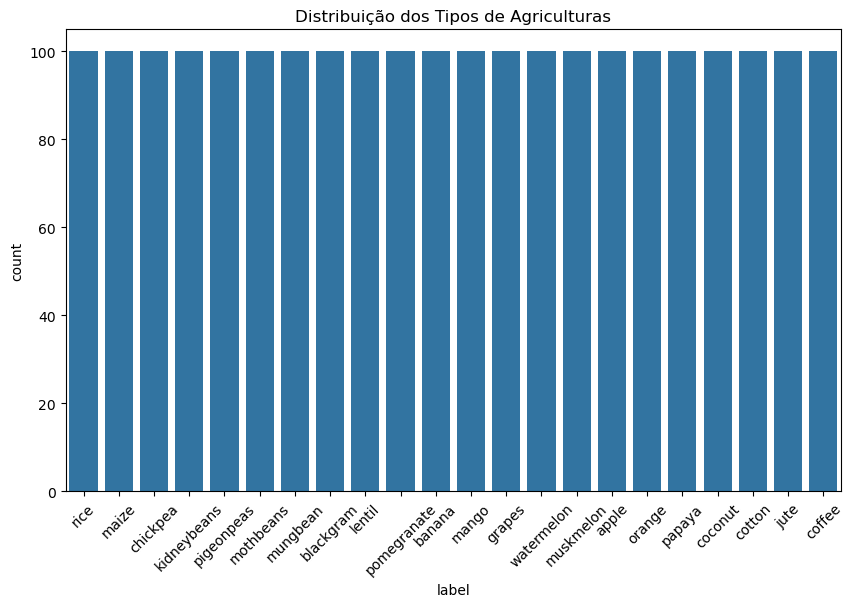

In [10]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title("Distribuição dos Tipos de Agriculturas")
plt.xticks(rotation=45)
plt.show()

**Análise do gráfico acima**: Existem 22 tipos diferentes de agriculturas, distribuidas uniformemente em 100 recorrências. Esse é um problema de classificação multiclasse.

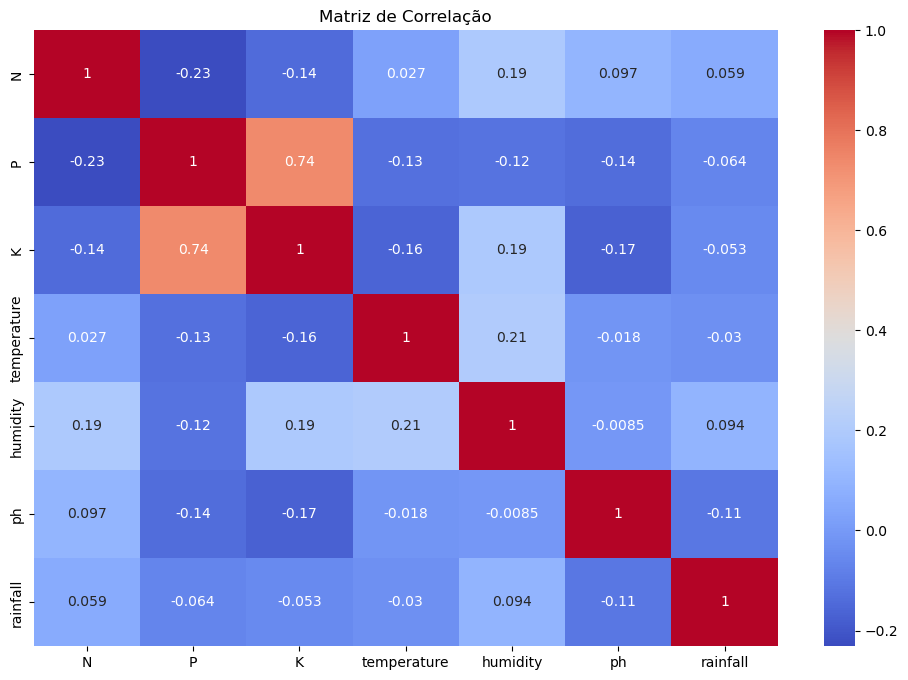

In [11]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

**Matrix do correlação**: para avaliar a correlação entre as variáveis numéricas.

As variáveis P e K são fortemente correlacionadas diretamente proporcional, quanto maior o valor do P maior o de K, pois está mais próximo de 1.

Já as variáveis P e N são fortemente correlacionadas inversamente proporcional, quanto maior o valor de P, menor o de N, pois o valor está negativo.

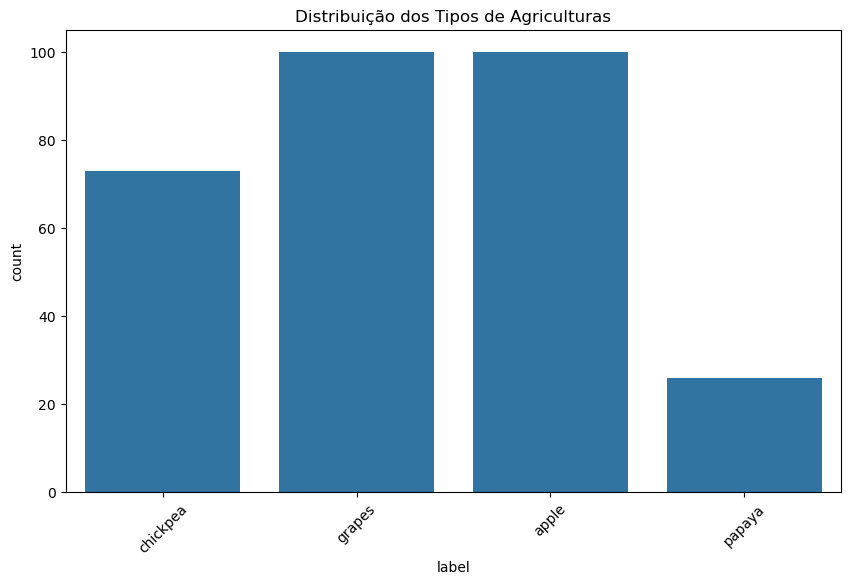

In [12]:
#Algorítmo para encontrar o perfil ideal e os produtos
# Para encontrar o perfil ideal escolhemos como base os produtos Fósforo (P),
# Potássio (K) e Nitrogênio (N), pois esses valores possuem maior correlação.

mean_P = 53.362727 #média de Fosfóro

df_ideal_profile = df[(df['P'] >= mean_P)] #reduzir os dados pegando somente linhas que usam quantidade
                                           #fósforo maior ou igual a média, ou seja, quantidade mais 
                                           # Alta de fósforo

mean_K = 48.149091 #média de Potássio

df_ideal_profile = df_ideal_profile[(df_ideal_profile['K'] >= mean_K)] #reduzir os dados pegando somente linhas que usam quantidade
                                           #potássio maior ou igual a média, ou seja, quantidade mais 
                                           # Alta de postássio

mean_N = 50.551818 ##média de fósforo

df_ideal_profile = df_ideal_profile[(df_ideal_profile['N'] <= mean_N)] #reduzir os dados pegando somente linhas que usam quantidade
                                           #nitrogênio menor ou igual a média, ou seja, quantidade mais 
                                           # baixa de nitrogênio
                                           # Fizemos essa decisão pois quanto mais fósforo, mais potássio e menos nitrogênio, 
                                           # de acordo com a matrix de correlação

# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_ideal_profile)
plt.title("Distribuição dos Tipos de Agriculturas")
plt.xticks(rotation=45)
plt.show()

**Análise do perfil ideal**
Analisando o gráfico Matriz de Correlação, foi possível identificar que o Potássio e o Fósforo são inversamente proporcionais ao Nitrogênio. Com base nesse insight, definimos o perfil ideal e o resultado é apresentado no gráfico acima: onde chickpea (grão-de-bico), grapes (uvas) e apple (maçã) seriam as culturas mais adequadas, visto que estão atingindo mais de 70% de compatibilidade. Então essas culturas preferem mais Potássio e Fósforo que nitrogênio.

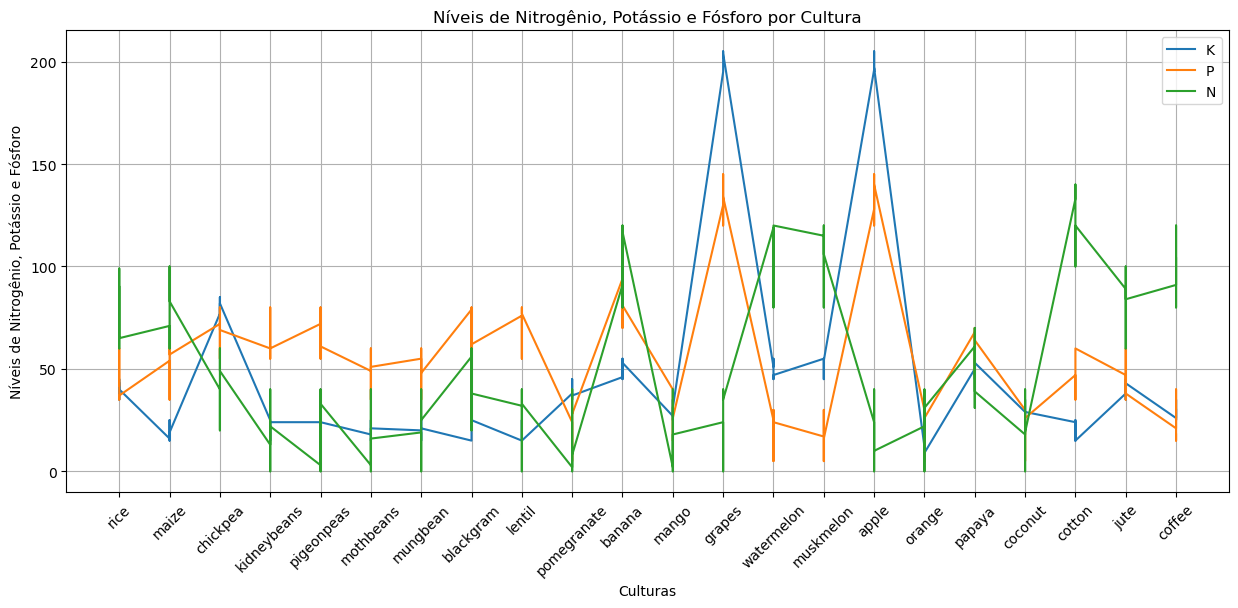

In [13]:
#gráfico comparativo para identificar os níveis de Nitrogênio, Potássio e Fósforo de cada cultura.
coluna_x = 'label'
colunas_y = ['K', 'P', 'N']

plt.figure(figsize=(15,6))
for i in colunas_y:
    plt.plot(df[coluna_x], df[i], label=[i])
plt.title('Níveis de Nitrogênio, Potássio e Fósforo por Cultura')
plt.xlabel('Culturas')
plt.ylabel('Níveis de Nitrogênio, Potássio e Fósforo')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

**Análise do gráfico acima:** Pelo gráfico acima, dá para perceber o comprtamento das culturas em relação ao Nitrogênio, Potássio e Fósforo, e que para as 3 culturas chickpea (grão-de-bico), grapes (uvas) e apple (maçã), sempre há 2 linhas em sentido oposto de 1, indicando 2 que os 2 produtos são proporcionais enquanto o outro, principalmente para uvas e maçã.

### 🌻 Engenharia de features

Finalizada a exploração a limpeza da base, inicia-se a Engenhria de features, onde serão realizados:

1. Separação das features (X) das labels (Y).
2. Transformação da label, que é uma string, em número.
4. Separação dos dados em treino (80%) e teste (20%).
5. Normalização das features numéricas.
   

In [14]:

# Separando features e labels
X = df.drop('label', axis=1)
y = df['label']

# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)
y

array([20, 20, 20, ...,  5,  5,  5], shape=(2200,))

In [15]:
#Dividindo os dados em conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Normalização das features numéricas
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🎉 Modelos Preditivos

Como a base de dados possui uma label, ou seja, um rótulo, serão utilizados modelos supervisionados.
Com os dados normalizados e já separados para treinamento e teste, abaixo têm-se a aplicação dos modelos:

1. KNN, com o valor de k=9.
2. DecisionTree
3. SVC
4. Random Forest
5. Regressão logística


In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))

Acurácia KNN: 0.9795454545454545


In [17]:
print(confusion_matrix(y_test, y_pred_knn))

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [18]:
# DecisionTree
decisiontree = DecisionTreeClassifier(random_state=50)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [19]:
y_decisiontree_predict = decisiontree.predict(X_test)
decisiontree_accuracy = accuracy_score(y_test, y_decisiontree_predict)
print(f"Acurácia Árvore de Decisão: {decisiontree_accuracy}")

Acurácia Árvore de Decisão: 0.9795454545454545


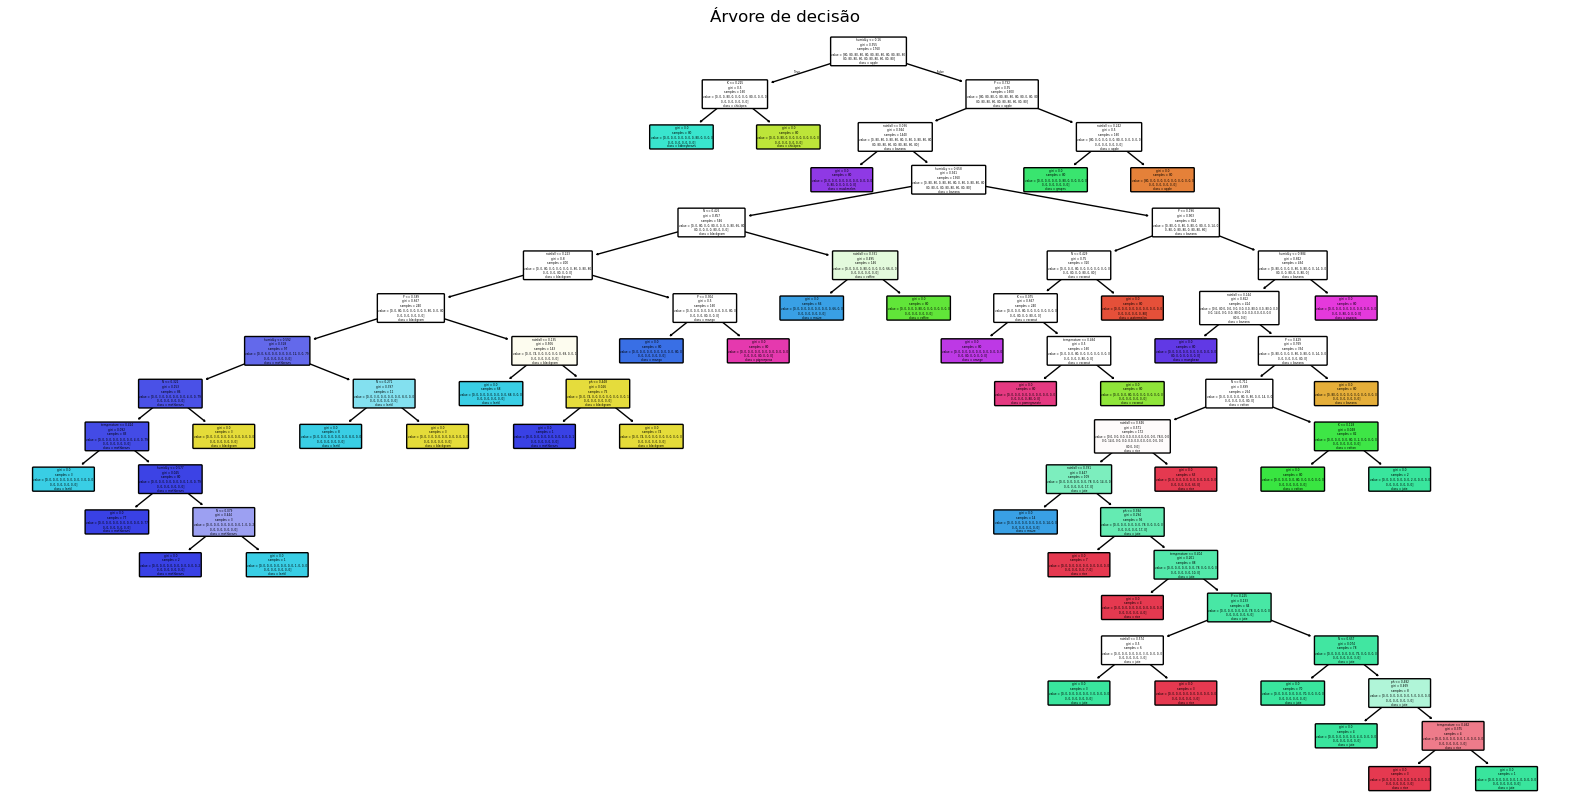

In [20]:
decisiontree_nomes = le.classes_
plt.figure(figsize=(20,10))
plot_tree(decisiontree,
             feature_names = X.columns.tolist(),
             class_names = decisiontree_nomes,
             filled = True,
             rounded = True,
             fontsize=2)
plt.title("Árvore de decisão")
plt.show()

In [21]:
#SVM
scale_svc = StandardScaler()

svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [22]:
y_svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_svc_predict)
print(f"Acurácia do SVC: {svc_accuracy}")

Acurácia do SVC: 0.9863636363636363


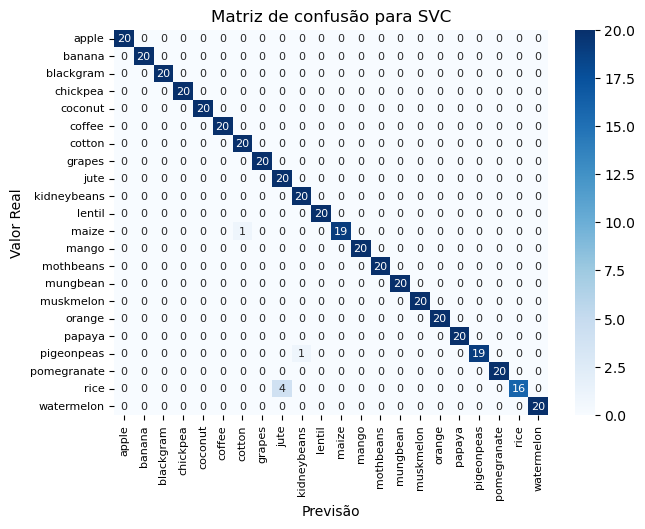

In [23]:
svc_matriz = (confusion_matrix(y_test, y_svc_predict))
class_names = le.classes_

plt.figure(figsize=(7,5))
sns.heatmap(svc_matriz,
            annot=True,
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=True,
            annot_kws={"fontsize":8})
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Matriz de confusão para SVC')
plt.show()

In [24]:
# Random Forest
# A floresta aleatória (Random Forest) é um modelo baseado em múltiplas árvores de decisão que votam em conjunto para realizar a predição.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred_rf = rf_model.predict(X_test)
print("Acurácia da Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Acurácia da Random Forest: 0.9954545454545455

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
     

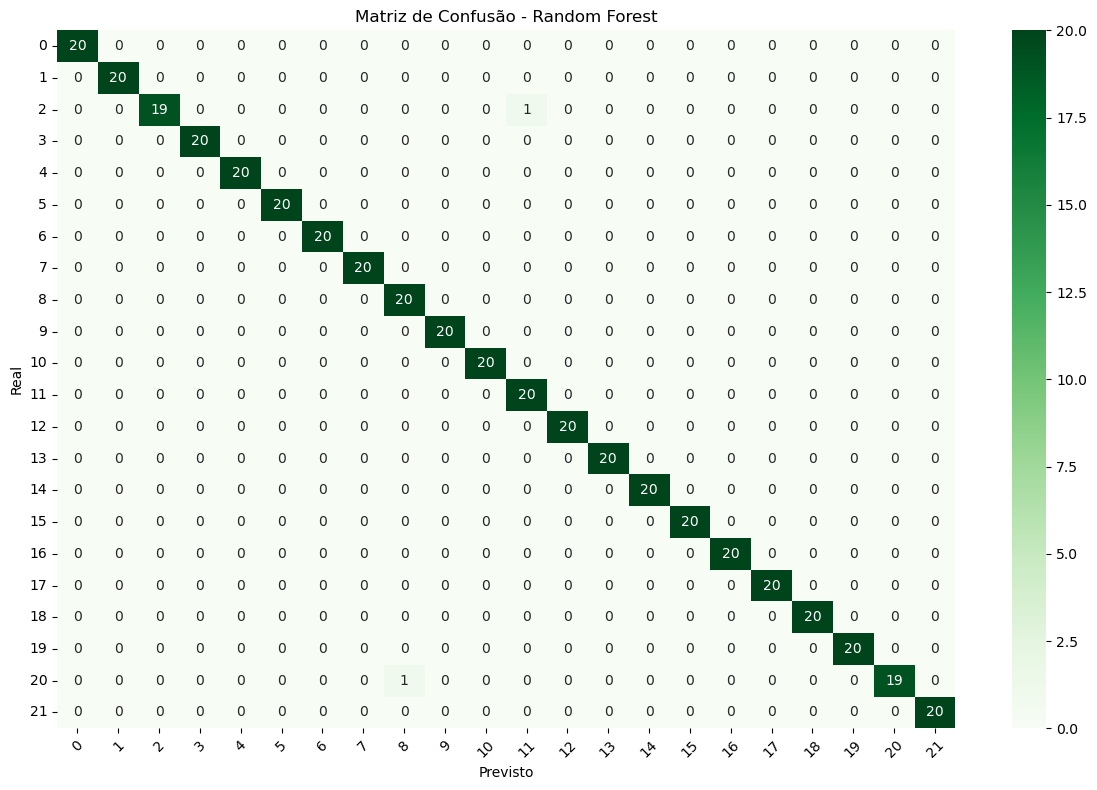

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

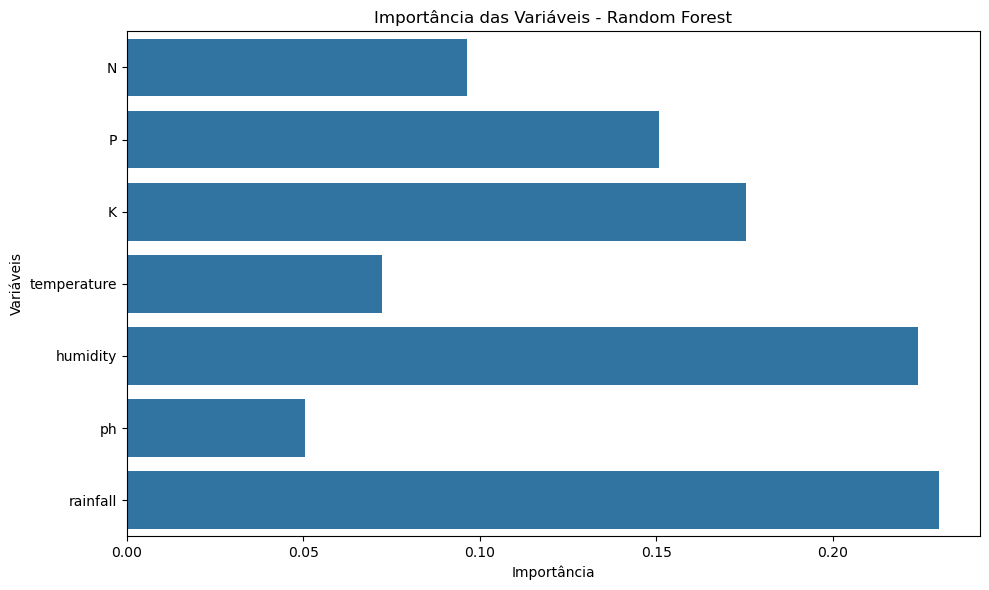

In [27]:
# Importância das variáveis
# Este gráfico mostra quais variáveis (ex: nitrogênio, pH, temperatura) têm maior influência na tomada de decisão do modelo. Isso ajuda a entender quais características do solo/clima mais impactam na recomendação da cultura.

importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, legend=False)
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

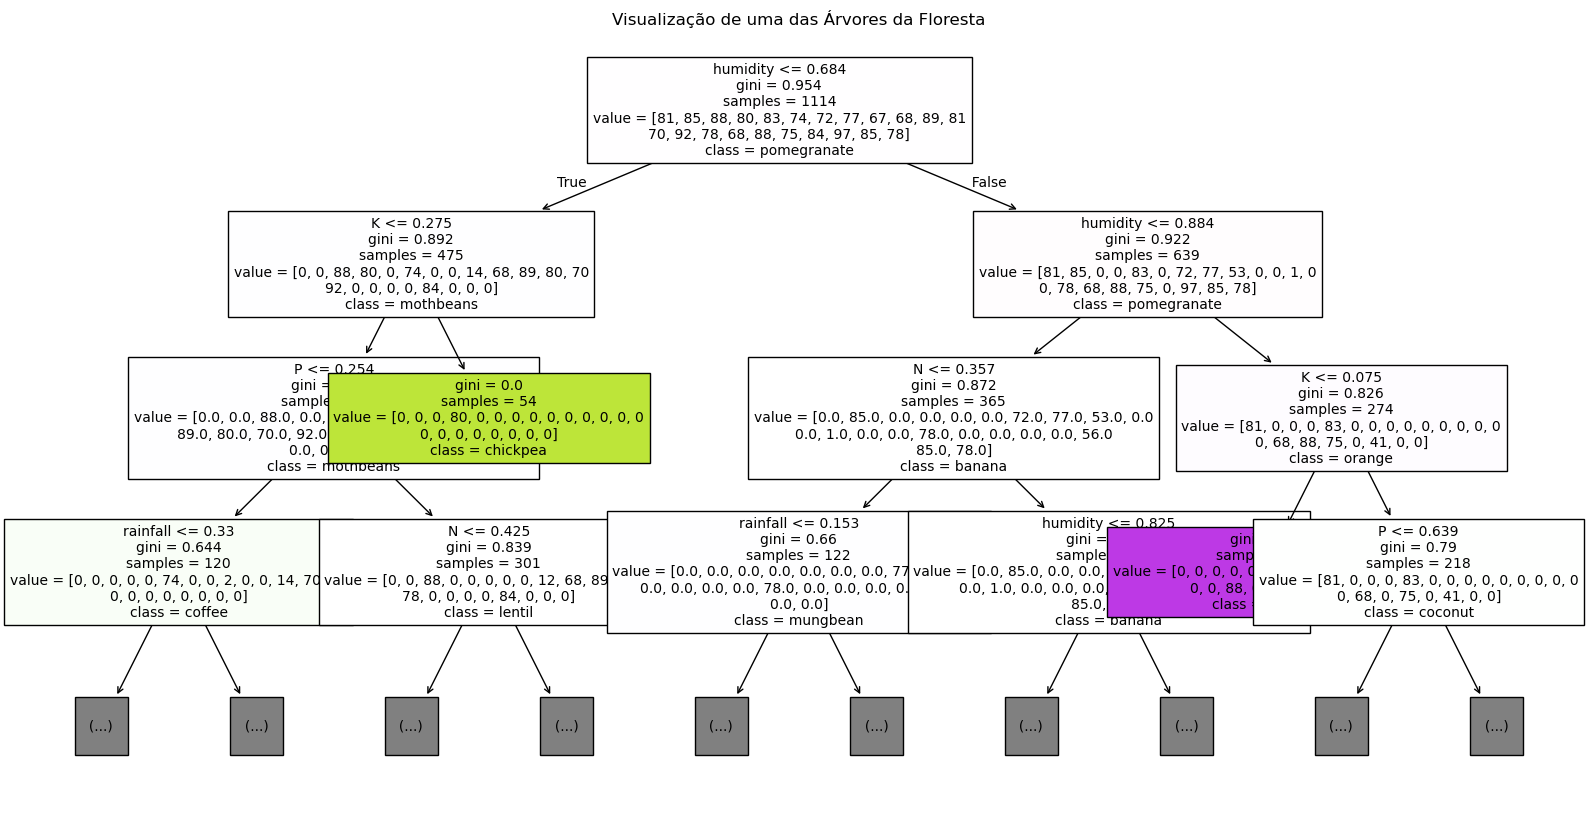

In [28]:
# 🌳 Visualizar uma árvore da floresta (apenas uma das 100)
plt.figure(figsize=(20, 10))
original_class_names = le.inverse_transform(rf_model.classes_)
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=original_class_names, filled=True, max_depth=3, fontsize=10)
plt.title("Visualização de uma das Árvores da Floresta")
plt.show()

In [29]:
# Logistic Regression
# A Regressão Logística é um modelo estatístico clássico usado para classificação. Embora originalmente binária, ela pode ser adaptada para múltiplas classes, como no nosso caso. A seguir, aplicamos esse modelo para prever o tipo de produto agrícola a partir das condições de solo e clima.

logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred_logreg = logreg.predict(X_test)
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

Acurácia da Regressão Logística: 0.9409090909090909

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.87      1.00      0.93        20
           7       1.00      1.00      1.00        20
           8       1.00      0.80      0.89        20
           9       0.91      1.00      0.95        20
          10       0.89      0.85      0.87        20
          11       1.00      0.85      0.92        20
          12       0.83      1.00      0.91        20
          13       0.88      0.75      0.81        20
          14       0.91      1.00      0.95        20
          15       0.91      1.00      0.95        20

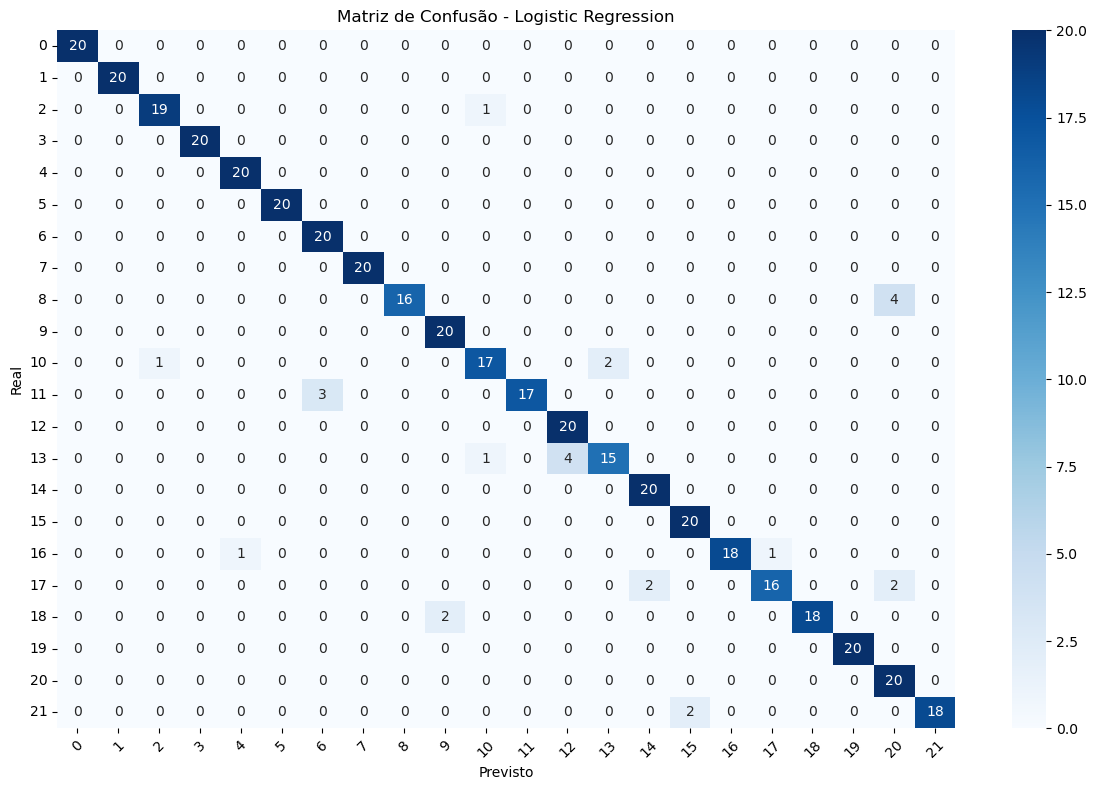

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

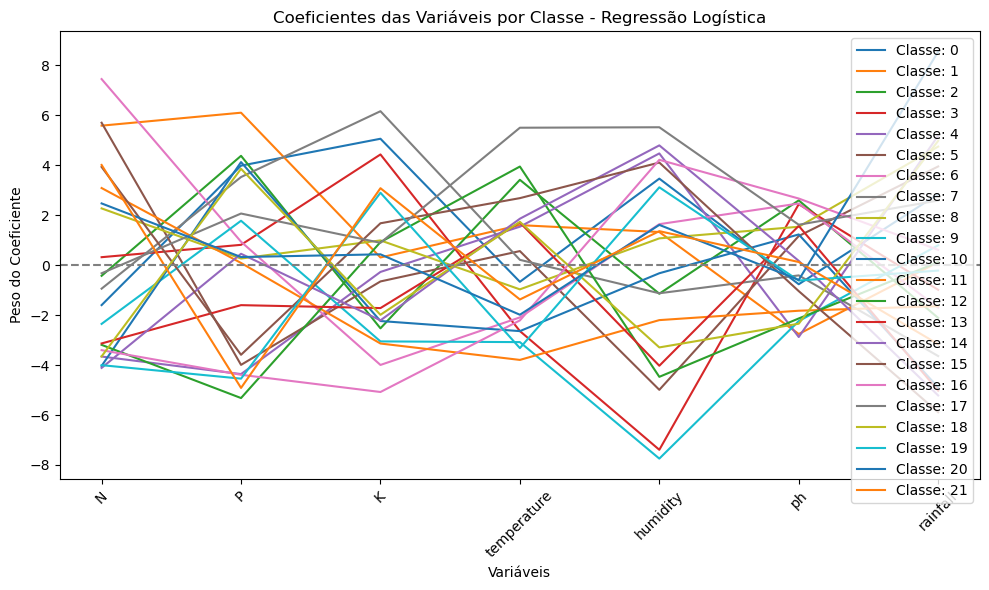

In [32]:
# Coeficientes das Variáveis por Classe
# Este gráfico mostra como cada variável influencia na probabilidade de uma amostra ser classificada em determinada classe. Valores positivos indicam aumento na chance de pertencer àquela cultura, enquanto valores negativos indicam o contrário.

plt.figure(figsize=(10, 6))
coef_matrix = logreg.coef_
for i in range(coef_matrix.shape[0]):
    sns.lineplot(x=X.columns, y=coef_matrix[i], label=f'Classe: {logreg.classes_[i]}')

plt.title("Coeficientes das Variáveis por Classe - Regressão Logística")
plt.ylabel("Peso do Coeficiente")
plt.xlabel("Variáveis")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Acurácia de todos os modelos preditivos
print(f"Acurácia KNN: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print(f"Acurácia Árvore de Decisão: {decisiontree_accuracy * 100:.2f}%")
print(f"Acurácia do SVC: {svc_accuracy * 100:.2f}%")
print(f"Acurácia da Random Forest:, {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"Acurácia da Regressão Logística:, { accuracy_score(y_test, y_pred_logreg) * 100:.2f}%")

Acurácia KNN: 97.95%
Acurácia Árvore de Decisão: 97.95%
Acurácia do SVC: 98.64%
Acurácia da Random Forest:, 99.55%
Acurácia da Regressão Logística:, 94.09%


**Análise dos modelos preditivos**
Entre os modelos preditivos analisados acima, foi possível identificar que o Modelo Random Forest obteve o melhor desempenho na acurácia, destacando-se entre os demais.